### In this assignment, students will be using the K-nearest neighborsalgorithm to predict how many points NBA players scored in the 2013-2014 season.
### A look at the data Before we dive into the algorithm, let’s take a look at our data. Each row inthe data contains information on how a player performed in the 2013-2014 NBA season.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df= pd.read_csv('nba_2013.csv')

In [3]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
## How many rows & columns in this data
df.shape

(481, 31)

In [5]:
## Total size of data
df.size

14911

In [6]:
df.info

<bound method DataFrame.info of              player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  \
0        Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468   
1      Steven Adams   C   20          OKC  81  20  1197   93   185  0.503   
2       Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520   
3     Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459   
4     Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546   
..              ...  ..  ...          ...  ..  ..   ...  ...   ...    ...   
476     Tony Wroten  SG   20          PHI  72  16  1765  345   808  0.427   
477      Nick Young  SG   28          LAL  64   9  1810  387   889  0.435   
478  Thaddeus Young  PF   25          PHI  79  78  2718  582  1283  0.454   
479     Cody Zeller   C   21          CHA  82   3  1416  172   404  0.426   
480    Tyler Zeller   C   24          CLE  70   9  1049  156   290  0.538   

     ...  drb  trb  ast  stl  blk  tov   pf

In [7]:
## Description of the data
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [8]:
df.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [9]:
### Checking null values
df.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [10]:
## Replacing null values with its median 
df['ft.'].fillna(df['ft.'].median(),inplace=True)
df['fg.'].fillna(df['fg.'].median(),inplace=True)
df['x3p.'].fillna(df['x3p.'].median(),inplace=True)
df['x2p.'].fillna(df['x2p.'].median(),inplace=True)
df['efg.'].fillna(df['efg.'].median(),inplace=True)

In [11]:
df.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [12]:
df.duplicated().any()

False

In [13]:
df.drop('player',axis=1,inplace=True)
df.drop('bref_team_id',axis=1,inplace=True)
df.drop('season',axis=1,inplace=True)
df.drop('season_end',axis=1,inplace=True)

In [14]:
df.columns

Index(['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [15]:
df['pos'].value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
F       1
G       1
Name: pos, dtype: int64

In [16]:
new_pos=pd.get_dummies(df['pos'],prefix='pos',drop_first=True)
new_pos

,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,0,0,0,0,1,0
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
476,0,0,0,0,0,1
477,0,0,0,0,0,1
478,0,0,1,0,0,0
479,0,0,0,0,0,0


In [17]:
df.drop('pos',axis=1,inplace=True)

In [18]:
df.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,0.581,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,0.639,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328


In [19]:
df=pd.concat([df,new_pos],axis=1)

In [20]:
df.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,blk,tov,pf,pts,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,26,30,122,171,0,0,0,0,1,0
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,57,71,203,265,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,36,39,108,362,0,0,1,0,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,3,146,136,1330,0,0,0,0,0,1
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,46,63,187,328,0,0,0,0,0,0


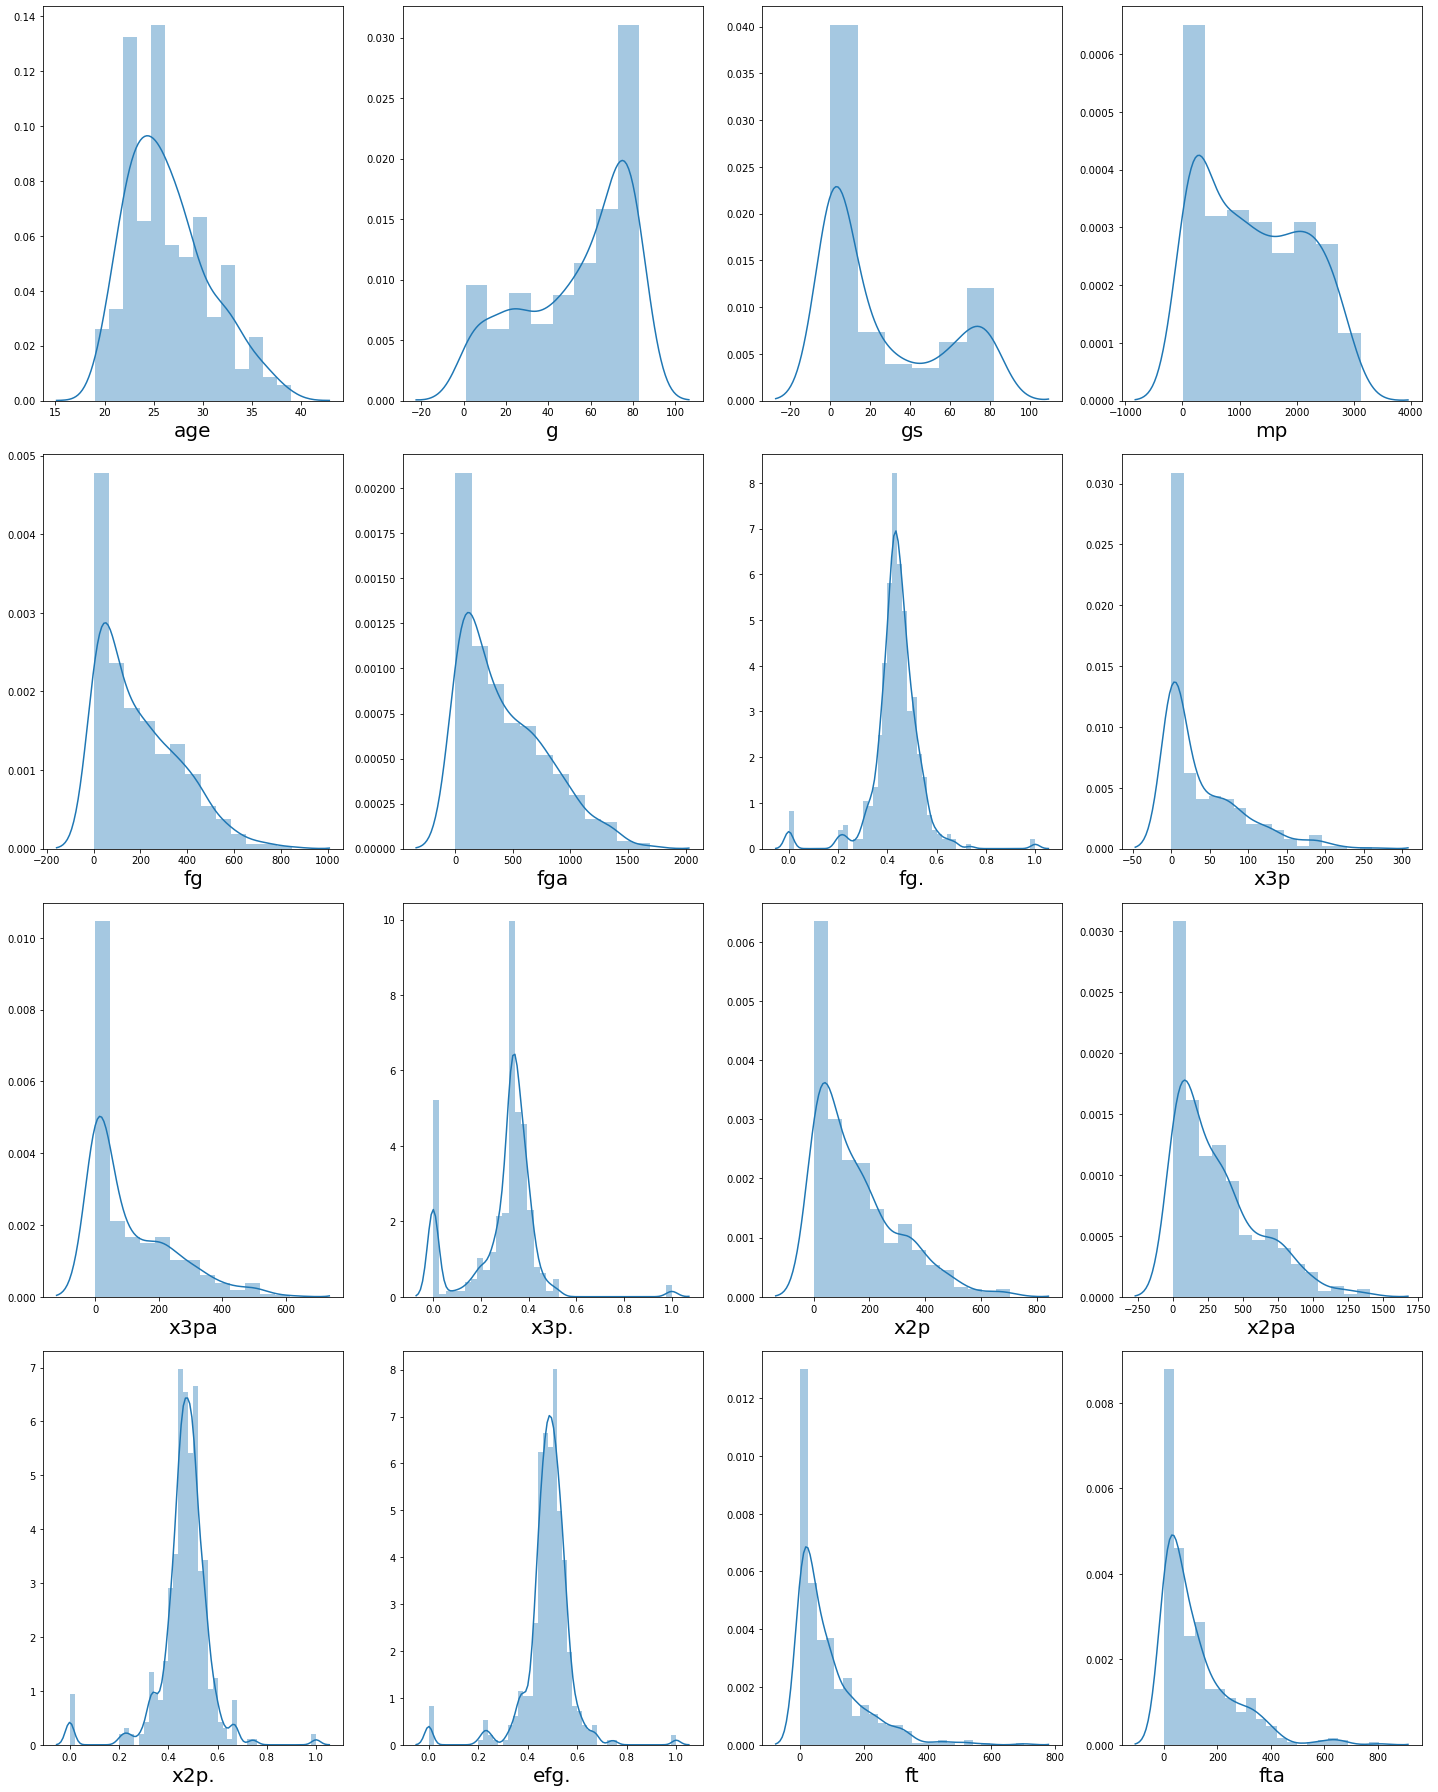

In [21]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

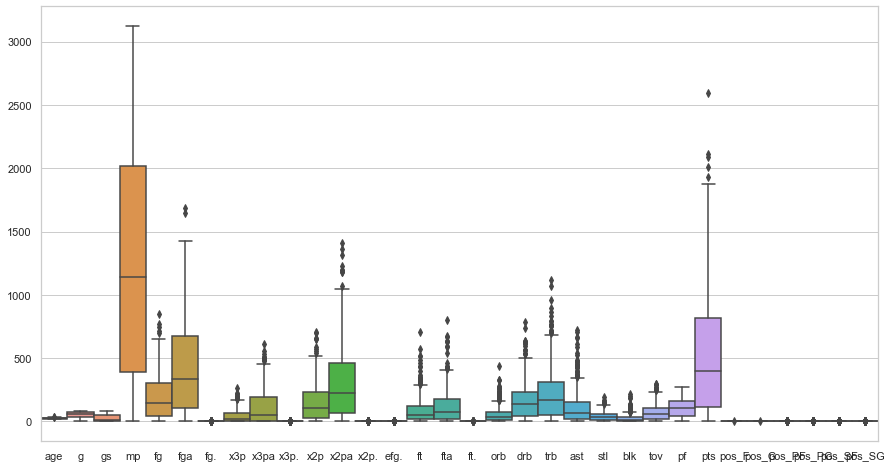

In [22]:
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1, style='whitegrid')
sns.boxplot(data=df,width=1,fliersize=5)

In [23]:
X = df.drop('pts',axis=1)
y = df['pts']

### Without Standardizing

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

##### Applying KNN Regressor as the values are continuous

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [26]:
## Model Score
knr.score(x_test,y_test)

0.9795107093730114

In [27]:
y_pred = knr.predict(x_test)

#### Evaluating the model

In [28]:
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE:  4080.937103448275
RMSE:  63.88221273130945


#### Actual V/s Prediction

In [29]:
data = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})
data

,Actual Points,Predicted Points
0,587,623.2
1,89,98.8
2,350,325.2
3,1417,1350.6
4,1071,1081.4
...,...,...
140,525,552.0
141,197,203.4
142,138,171.0
143,1330,1229.4


### With Standardizing

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,Features
0,1.147194,age
1,8.090007,g
2,6.273798,gs
3,47.460812,mp
4,inf,fg
5,inf,fga
6,23.338264,fg.
7,inf,x3p
8,inf,x3pa
9,1.795572,x3p.


In [32]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [33]:
knr_scaled = KNeighborsRegressor()
knr_scaled.fit(x_train,y_train)

KNeighborsRegressor()

In [34]:
## Model Score
knr_scaled.score(x_test,y_test)

0.9610799714089038

In [35]:
y_pred_2 = knr_scaled.predict(x_test)

#### Evaluating the model

In [36]:
print("MSE: ",mean_squared_error(y_test,y_pred_2))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_2)))

MSE:  7751.863724137931
RMSE:  88.0446689137845


##### Actual v/s Prediction

In [37]:
data = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred_2.tolist()})
data

,Actual Points,Predicted Points
0,587,475.2
1,89,172.6
2,350,350.0
3,1417,1512.6
4,1071,922.6
...,...,...
140,525,664.4
141,197,234.4
142,138,146.0
143,1330,1191.0


### With Normalization

In [38]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X_norm = norm.fit_transform(X)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.3,random_state=42)

In [40]:
knr_norm = KNeighborsRegressor()
knr_norm.fit(x_train,y_train)

KNeighborsRegressor()

In [41]:
## Model Score
knr_norm.score(x_test,y_test)

0.6820088360944019

In [42]:
y_new_pred = knr_norm.predict(x_test)

In [47]:
print("MSE: ",mean_squared_error(y_test,y_new_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_new_pred)))

MSE:  63335.620689655174
RMSE:  251.66569231751708
